In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv("iris_dataset.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
df = df.iloc[:50, :2]
df.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [3]:
df.shape

(50, 2)

In [4]:
X=df[['sepal_length']].to_numpy()
X

array([[5.1],
       [4.9],
       [4.7],
       [4.6],
       [5. ],
       [5.4],
       [4.6],
       [5. ],
       [4.4],
       [4.9],
       [5.4],
       [4.8],
       [4.8],
       [4.3],
       [5.8],
       [5.7],
       [5.4],
       [5.1],
       [5.7],
       [5.1],
       [5.4],
       [5.1],
       [4.6],
       [5.1],
       [4.8],
       [5. ],
       [5. ],
       [5.2],
       [5.2],
       [4.7],
       [4.8],
       [5.4],
       [5.2],
       [5.5],
       [4.9],
       [5. ],
       [5.5],
       [4.9],
       [4.4],
       [5.1],
       [5. ],
       [4.5],
       [4.4],
       [5. ],
       [5.1],
       [4.8],
       [5.1],
       [4.6],
       [5.3],
       [5. ]])

In [5]:
y = df[['sepal_width']].to_numpy()
y

array([[3.5],
       [3. ],
       [3.2],
       [3.1],
       [3.6],
       [3.9],
       [3.4],
       [3.4],
       [2.9],
       [3.1],
       [3.7],
       [3.4],
       [3. ],
       [3. ],
       [4. ],
       [4.4],
       [3.9],
       [3.5],
       [3.8],
       [3.8],
       [3.4],
       [3.7],
       [3.6],
       [3.3],
       [3.4],
       [3. ],
       [3.4],
       [3.5],
       [3.4],
       [3.2],
       [3.1],
       [3.4],
       [4.1],
       [4.2],
       [3.1],
       [3.2],
       [3.5],
       [3.1],
       [3. ],
       [3.4],
       [3.5],
       [2.3],
       [3.2],
       [3.5],
       [3.8],
       [3. ],
       [3.8],
       [3.2],
       [3.7],
       [3.3]])

- In the prevoius example, the epochs are set to 100. So we will be having 100 iterations to get the min value. But we can reach to the min value near the 55th iteration itself. The extra 45 iterations costs us computational cost and memory usage. To avoid this, we can stop the iterations much early. We can stop if the change in is loss is less than 1%.

In [6]:
class MyLinReg(object):
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def fit(self, X, y, alpha=0.001, epochs=100):
        self.theta = np.random.rand(X.shape[1] + 1)
        self.errors = []
        n = X.shape[0]
        prev_loss = float('inf')  # Initialize previous loss

        for epoch in range(epochs):
            errors = 0
            sum_1 = 0
            sum_2 = 0
            for xi, yi in zip(X, y):
                sum_1 += (self.predict(xi) - yi) * xi
                sum_2 += (self.predict(xi) - yi)
                errors += ((self.predict(xi) - yi) ** 2)

            self.theta[:-1] -= 2 * alpha * sum_1 / n
            self.theta[-1] -= 2 * alpha * sum_2 / n
            self.errors.append(errors / n)

            loss_change = abs(prev_loss - (errors / n)) / prev_loss

            if loss_change < 0.01:
                print(f"Converged at epoch {epoch + 1}")
                break

            prev_loss = errors / n

        return self

    def predict(self, X):
        weighted_sum = np.dot(X, self.theta[:-1]) + self.theta[-1]
        return self.activation_function(weighted_sum)

In [7]:
def identity_function(z):
    return z

In [8]:
model = MyLinReg(identity_function)
model.fit(X, y)

Converged at epoch 62


In [9]:
model.predict(X)

array([3.39247793, 3.29873625, 3.20499457, 3.15812373, 3.34560709,
       3.53309044, 3.15812373, 3.34560709, 3.06438206, 3.29873625,
       3.53309044, 3.25186541, 3.25186541, 3.01751122, 3.72057379,
       3.67370296, 3.53309044, 3.39247793, 3.67370296, 3.39247793,
       3.53309044, 3.39247793, 3.15812373, 3.39247793, 3.25186541,
       3.34560709, 3.34560709, 3.43934876, 3.43934876, 3.20499457,
       3.25186541, 3.53309044, 3.43934876, 3.57996128, 3.29873625,
       3.34560709, 3.57996128, 3.29873625, 3.06438206, 3.39247793,
       3.34560709, 3.1112529 , 3.06438206, 3.34560709, 3.39247793,
       3.25186541, 3.39247793, 3.15812373, 3.4862196 , 3.34560709])

In [10]:
X-model.predict(X)

array([[1.70752207, 1.80126375, 1.89500543, ..., 1.94187627, 1.6137804 ,
        1.75439291],
       [1.50752207, 1.60126375, 1.69500543, ..., 1.74187627, 1.4137804 ,
        1.55439291],
       [1.30752207, 1.40126375, 1.49500543, ..., 1.54187627, 1.2137804 ,
        1.35439291],
       ...,
       [1.20752207, 1.30126375, 1.39500543, ..., 1.44187627, 1.1137804 ,
        1.25439291],
       [1.90752207, 2.00126375, 2.09500543, ..., 2.14187627, 1.8137804 ,
        1.95439291],
       [1.60752207, 1.70126375, 1.79500543, ..., 1.84187627, 1.5137804 ,
        1.65439291]])

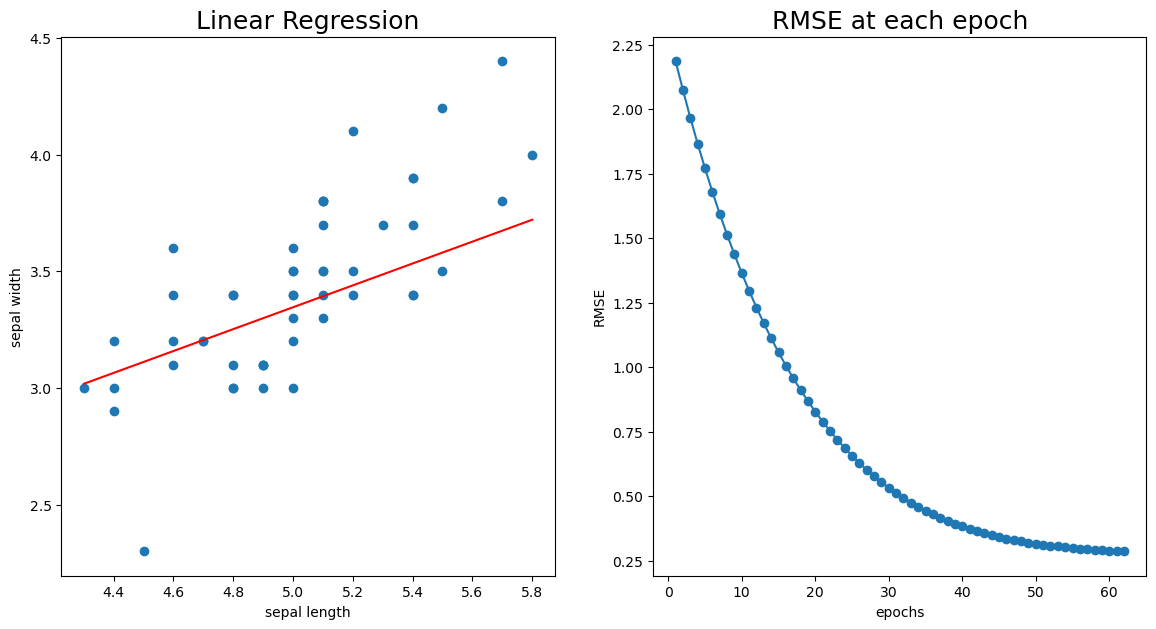

In [11]:
domain_x = np.linspace(np.min(X), np.max(X), 2)
domain_y = model.predict(domain_x.reshape(-1, 1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

ax1.scatter(X, y)
ax1.plot(domain_x, domain_y, color = "red")
ax1.set_xlabel("sepal length")
ax1.set_ylabel("sepal width")
ax1.set_title("Linear Regression", fontsize = 18)

ax2.plot(range(1, len(model.errors) + 1), 
         np.sqrt(model.errors),
         marker = "o")
ax2.set_xlabel("epochs")
ax2.set_ylabel("RMSE")
ax2.set_xticks(range(0, len(model.errors) + 1, 10))
ax2.set_title("RMSE at each epoch", fontsize = 18);

- `Inference` : We have reached to the local minima at a much earlier epoch itself. Its better to keep the maximum epochs and exit when it reaches the local minima using the if statement. We can save a lot of memory and the time as well. Time complexity reduces.

## SGD Regressor

In [12]:
import numpy as np
import random

class MyLinRegSGD(object):
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def fit(self, X, y, alpha=0.001, epochs=100):
        self.theta = np.random.rand(X.shape[1] + 1)
        self.errors = []

        n = X.shape[0]

        for _ in range(epochs):
            total_error = 0.0

            for i in range(n):
                random_index = random.randint(0, n - 1)
                xi, yi = X[random_index], y[random_index]

                prediction = self.predict(xi)
                error = prediction - yi

                # Update weights for the chosen sample
                self.theta[:-1] -= 2 * alpha * error * xi
                self.theta[-1] -= 2 * alpha * error

                total_error += error ** 2

            # Calculate RMSE for the epoch
            rmse = np.sqrt(total_error / n)
            self.errors.append(rmse)

        return self

    def predict(self, X):
        weighted_sum = np.dot(X, self.theta[:-1]) + self.theta[-1]
        return self.activation_function(weighted_sum)

In [13]:
model = MyLinRegSGD(identity_function)
model.fit(X, y)

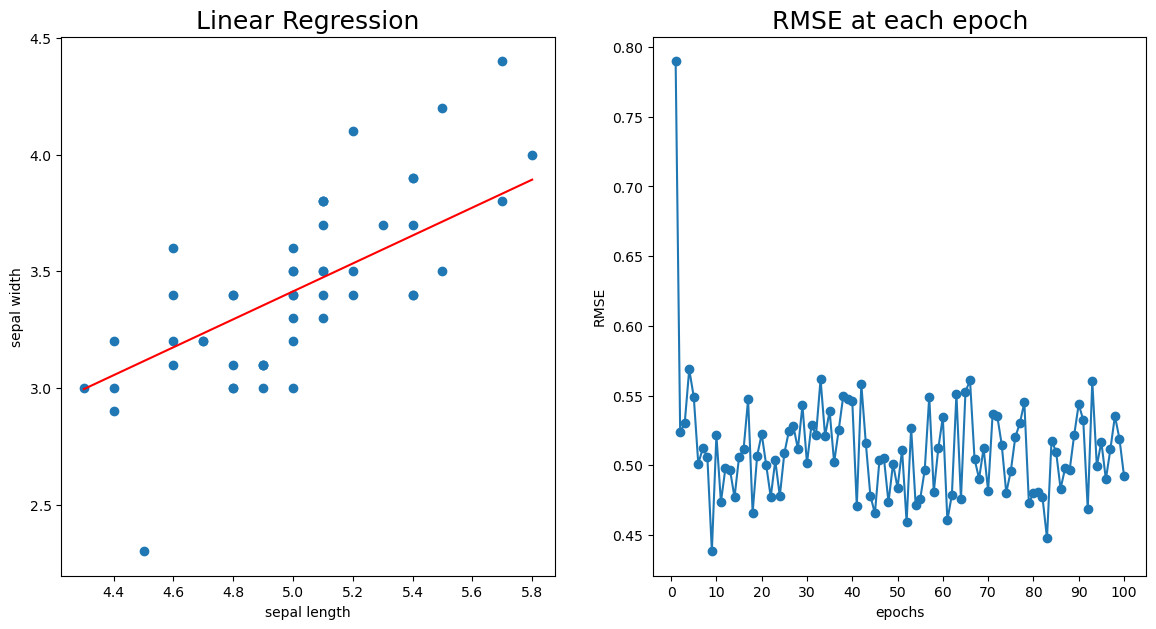

In [14]:
domain_x = np.linspace(np.min(X), np.max(X), 2)
domain_y = model.predict(domain_x.reshape(-1, 1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

ax1.scatter(X, y)
ax1.plot(domain_x, domain_y, color = "red")
ax1.set_xlabel("sepal length")
ax1.set_ylabel("sepal width")
ax1.set_title("Linear Regression", fontsize = 18)

ax2.plot(range(1, len(model.errors) + 1), 
         np.sqrt(model.errors),
         marker = "o")
ax2.set_xlabel("epochs")
ax2.set_ylabel("RMSE")
ax2.set_xticks(range(0, len(model.errors) + 1, 10))
ax2.set_title("RMSE at each epoch", fontsize = 18);

- For the batch gradient descent we can see the graph converges slowly and reaches the local minima after certain points. But in Stochastic gradient descent we can reach the local minima in few iterations. Basically follows the zig zag pattern.

In [15]:
import numpy as np

class MyLinRegSGD(object):
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def fit(self, X, y, alpha=0.001, epochs=100):
        self.theta = np.random.rand(X.shape[1] + 1)
        self.errors = []
        n = X.shape[0]
        prev_loss = float('inf')  # Initialize previous loss

        for epoch in range(epochs):
            for i in range(n):
                xi, yi = X[i], y[i]
                prediction = self.predict(xi)
                error = prediction - yi

                # Update weights for each sample
                self.theta[:-1] -= 2 * alpha * error * xi
                self.theta[-1] -= 2 * alpha * error

                # Compute and append loss for this sample
                sample_loss = error ** 2
                self.errors.append(sample_loss)

            # Calculate the mean loss for the entire epoch
            epoch_loss = np.mean(self.errors)

            loss_change = abs(prev_loss - epoch_loss) / prev_loss

            if loss_change < 0.01:
                print(f"Converged at epoch {epoch + 1}")
                break

            prev_loss = epoch_loss

        return self

    def predict(self, X):
        weighted_sum = np.dot(X, self.theta[:-1]) + self.theta[-1]
        return self.activation_function(weighted_sum)

In [16]:
model = MyLinRegSGD(identity_function)
model.fit(X, y)

Converged at epoch 37


In [17]:
# In SGD Regressor the value converges much ahead.

### Part 2

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[15,8]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error

In [19]:
df = pd.read_csv('advertising_dataset.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [20]:
# We can drop the column Unnamed:0, these are just the index numbers. 

In [21]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [22]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


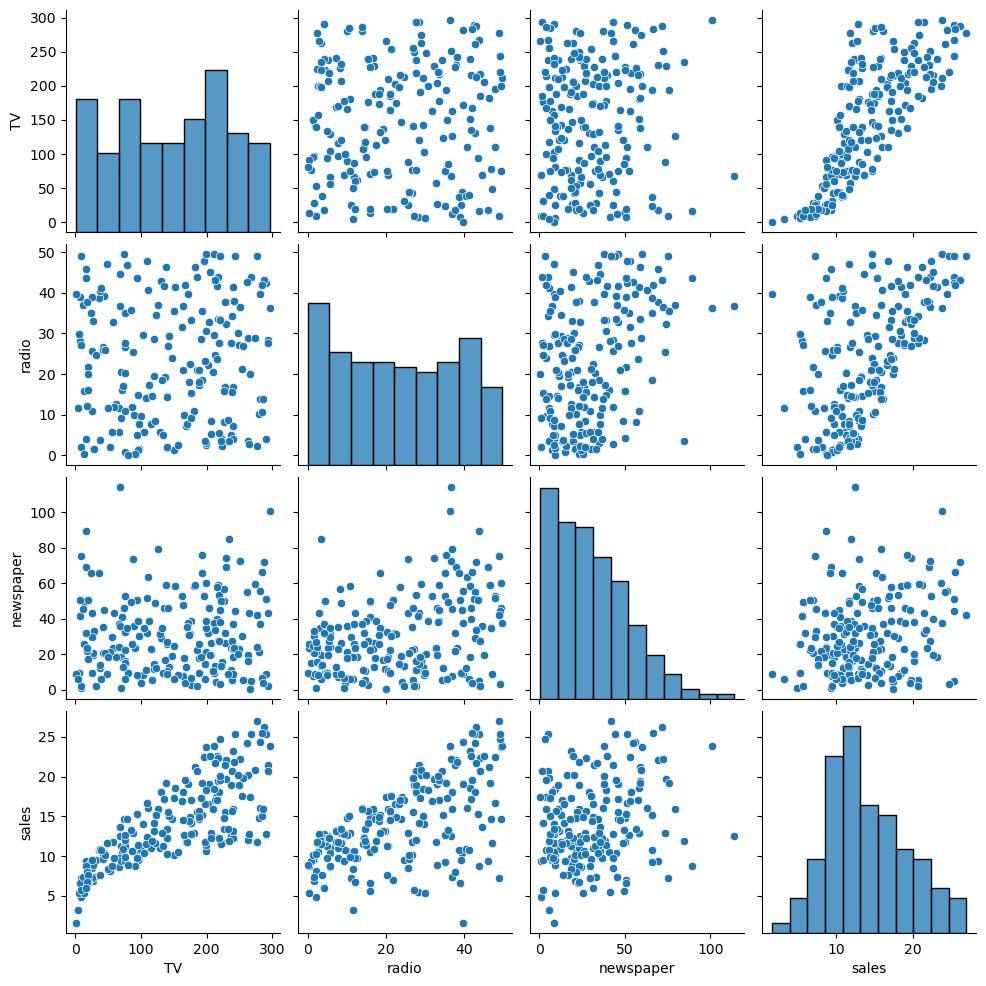

In [23]:
sns.pairplot(df)

In [24]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

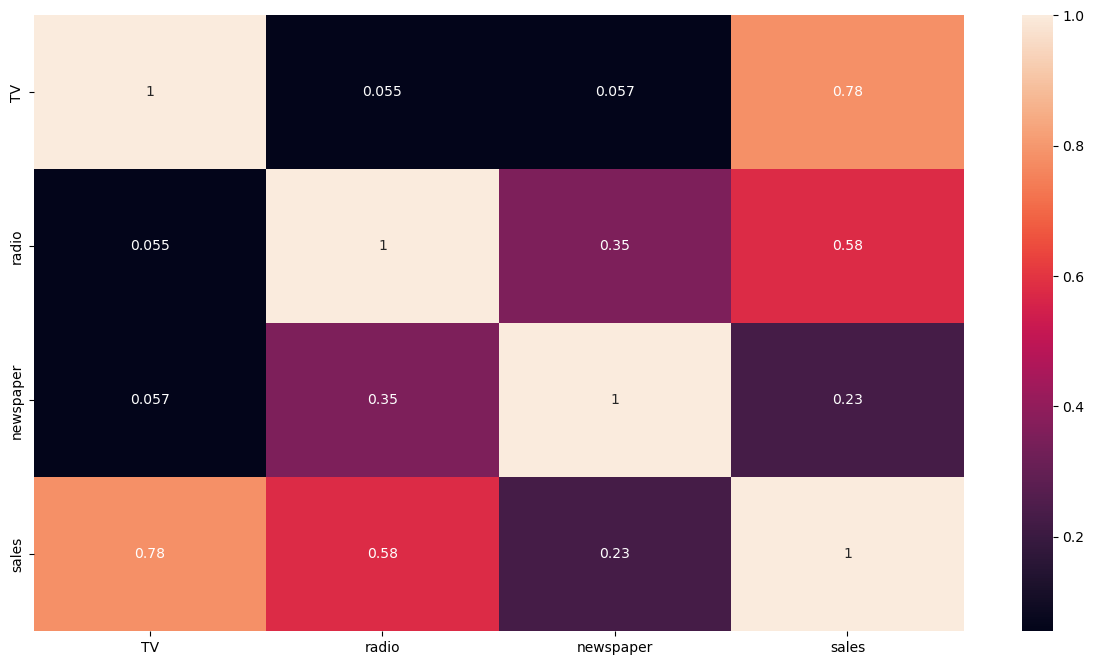

In [25]:
sns.heatmap(df.corr(), annot = True)

In [26]:
# We can see the highest correlation between Tv and Sales.

In [27]:
# Since we have used Linear Regressor in class, lets use SGD Regressor.

- To use SGD Regressor, we have to scale the input data. technically we have to scale the data after splitting the data. But here we are scaling the data and then applying train test split. In the next example we will be doing the splitting and then scale the input data. 

In [28]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [29]:
df_num = df[['TV', 'radio', 'newspaper']]
df_num

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
X_scaler = MinMaxScaler()
num_scaled = X_scaler.fit_transform(df_num)
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

In [32]:
df_num_scaled

,TV,radio,newspaper
0,0.775786,0.762097,0.605981
1,0.148123,0.792339,0.394019
2,0.055800,0.925403,0.606860
3,0.509976,0.832661,0.511873
4,0.609063,0.217742,0.510994
...,...,...,...
195,0.126818,0.074597,0.118734
196,0.316199,0.098790,0.068602
197,0.596212,0.187500,0.053650
198,0.956713,0.846774,0.579595


In [33]:
X = df_num_scaled[['TV']]
y = df['sales']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### SGDRegressor

In [35]:
sgd_reg = SGDRegressor()

sgd_reg.fit(X_train, y_train)

SGDRegressor()

In [36]:
w = sgd_reg.coef_
b = sgd_reg.intercept_
w, b

(array([12.57453325]), array([7.78779714]))

In [37]:
print("The SGD regression model based on the training data is \n")
print(f"predicted_sales = {np.round(w[0],3)} * TV + {np.round(b,3)}")

The SGD regression model based on the training data is 

predicted_sales = 12.575 * TV + [7.788]


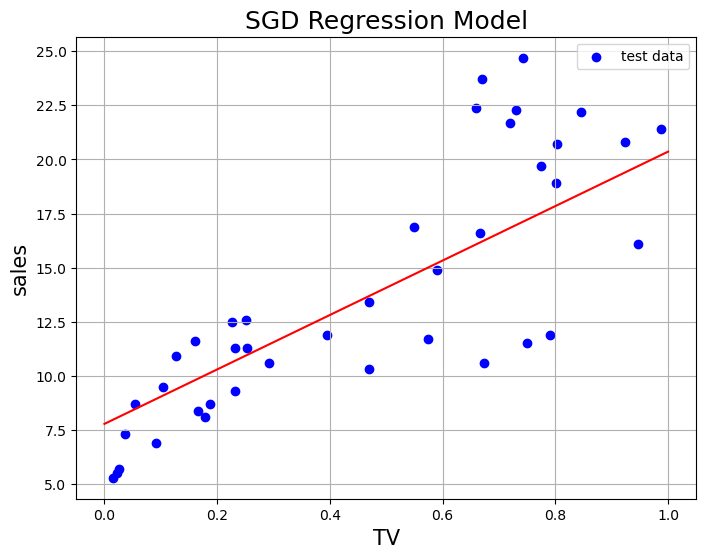

In [38]:
domain = np.linspace(X.min(), X.max(), 100)  

plt.figure(figsize = (8, 6))

#plt.scatter(X_train, y_train, color='green', label='training data')
plt.scatter(X_test, y_test, color='blue', label='test data')
plt.plot(domain, sgd_reg.predict(domain), color="red")
plt.title('SGD Regression Model', fontsize=18)
plt.xlabel('TV', fontsize=15)
plt.ylabel('sales', fontsize=15)
plt.legend()
plt.grid();

In [39]:
predictions = sgd_reg.predict(X)

df['predicted_sales'] = np.round(predictions)

residuals = df['predicted_sales'] - y

df['residuals'] = residuals

df

,TV,radio,newspaper,sales,predicted_sales,residuals
0,230.1,37.8,69.2,22.1,18.0,-4.1
1,44.5,39.3,45.1,10.4,10.0,-0.4
2,17.2,45.9,69.3,9.3,8.0,-1.3
3,151.5,41.3,58.5,18.5,14.0,-4.5
4,180.8,10.8,58.4,12.9,15.0,2.1
...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,9.0,1.4
196,94.2,4.9,8.1,9.7,12.0,2.3
197,177.0,9.3,6.4,12.8,15.0,2.2
198,283.6,42.0,66.2,25.5,20.0,-5.5


In [40]:
mse_train = mean_squared_error(y_train, sgd_reg.predict(X_train))
mse_test = mean_squared_error(y_test, sgd_reg.predict(X_test))

print(f"RMSE on the training data: {np.sqrt(mse_train)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test)}")

RMSE on the training data: 3.2739291076486525

RMSE on the test data: 3.257399998036191


- The difference between the RMSE of test data and train data is very low. We can say that the model is neither overfitting nor underfitting. Hence we can say that SGD Regressor works well when we apply scaling to the input data.

### Now lets apply scaling after splitting the data. 

In [41]:
#Lets use all the input features and check if the SGD Regressor works well or not.

In [42]:
df_num.head(2)

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1


In [43]:
X_train, X_test, y_train, y_test = train_test_split(df_num, y, test_size=0.2, random_state=42)

In [44]:
scaler = MinMaxScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [45]:
sgd_reg = SGDRegressor()

sgd_reg.fit(X_train_scaled, y_train)

SGDRegressor()

In [46]:
w = sgd_reg.coef_
b = sgd_reg.intercept_
w, b

(array([12.24152693,  8.50600427,  1.10742468]), array([3.71329291]))

In [47]:
print("The SGD regression model based on the training data is \n")
print(f"predicted_sales = {np.round(w[0],3)} * TV + {np.round(w[1],3)} * radio + {np.round(w[2],3)} * newspaper + {np.round(b,3)}")

The SGD regression model based on the training data is 

predicted_sales = 12.242 * TV + 8.506 * radio + 1.107 * newspaper + [3.713]


In [48]:
mse_train = mean_squared_error(y_train, sgd_reg.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, sgd_reg.predict(X_test_scaled))

print(f"RMSE on the training data: {np.sqrt(mse_train)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test)}")

RMSE on the training data: 1.6894029327744253

RMSE on the test data: 1.911108119012713


- The difference in RMSE of training and testing data is 0.2. We can see little to no overfitting in the data.

## Part 3

In [49]:
df = pd.read_csv('mtcars.csv')
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [50]:
df.rename({'Unnamed: 0':'Cars'}, axis =1, inplace = True)

In [51]:
df.head()

,Cars,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [52]:
df.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [53]:
df.corr()[(df.corr()>0.6) | (df.corr()<-0.8)]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,NaN,0.681172,-0.867659,NaN,0.664039,NaN,NaN,NaN
cyl,-0.852162,1.000000,0.902033,0.832447,NaN,0.782496,NaN,-0.810812,NaN,NaN,NaN
disp,-0.847551,0.902033,1.000000,0.790949,NaN,0.887980,NaN,NaN,NaN,NaN,NaN
hp,NaN,0.832447,0.790949,1.000000,NaN,0.658748,NaN,NaN,NaN,NaN,0.749812
drat,0.681172,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.712711,0.699610,NaN
wt,-0.867659,0.782496,0.887980,0.658748,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
qsec,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.744535,NaN,NaN,NaN
vs,0.664039,-0.810812,NaN,NaN,NaN,NaN,0.744535,1.000000,NaN,NaN,NaN
am,NaN,NaN,NaN,NaN,0.712711,NaN,NaN,NaN,1.000000,0.794059,NaN
gear,NaN,NaN,NaN,NaN,0.699610,NaN,NaN,NaN,0.794059,1.000000,NaN


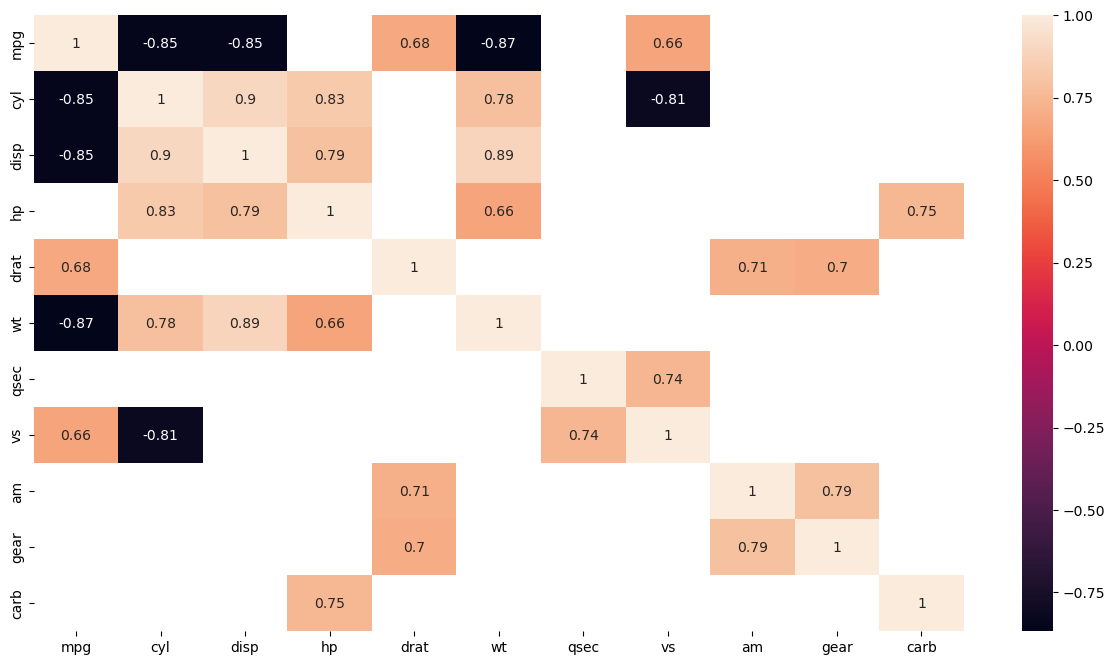

In [54]:
sns.heatmap(df.corr()[(df.corr()>0.6) | (df.corr()<-0.8)], annot = True);

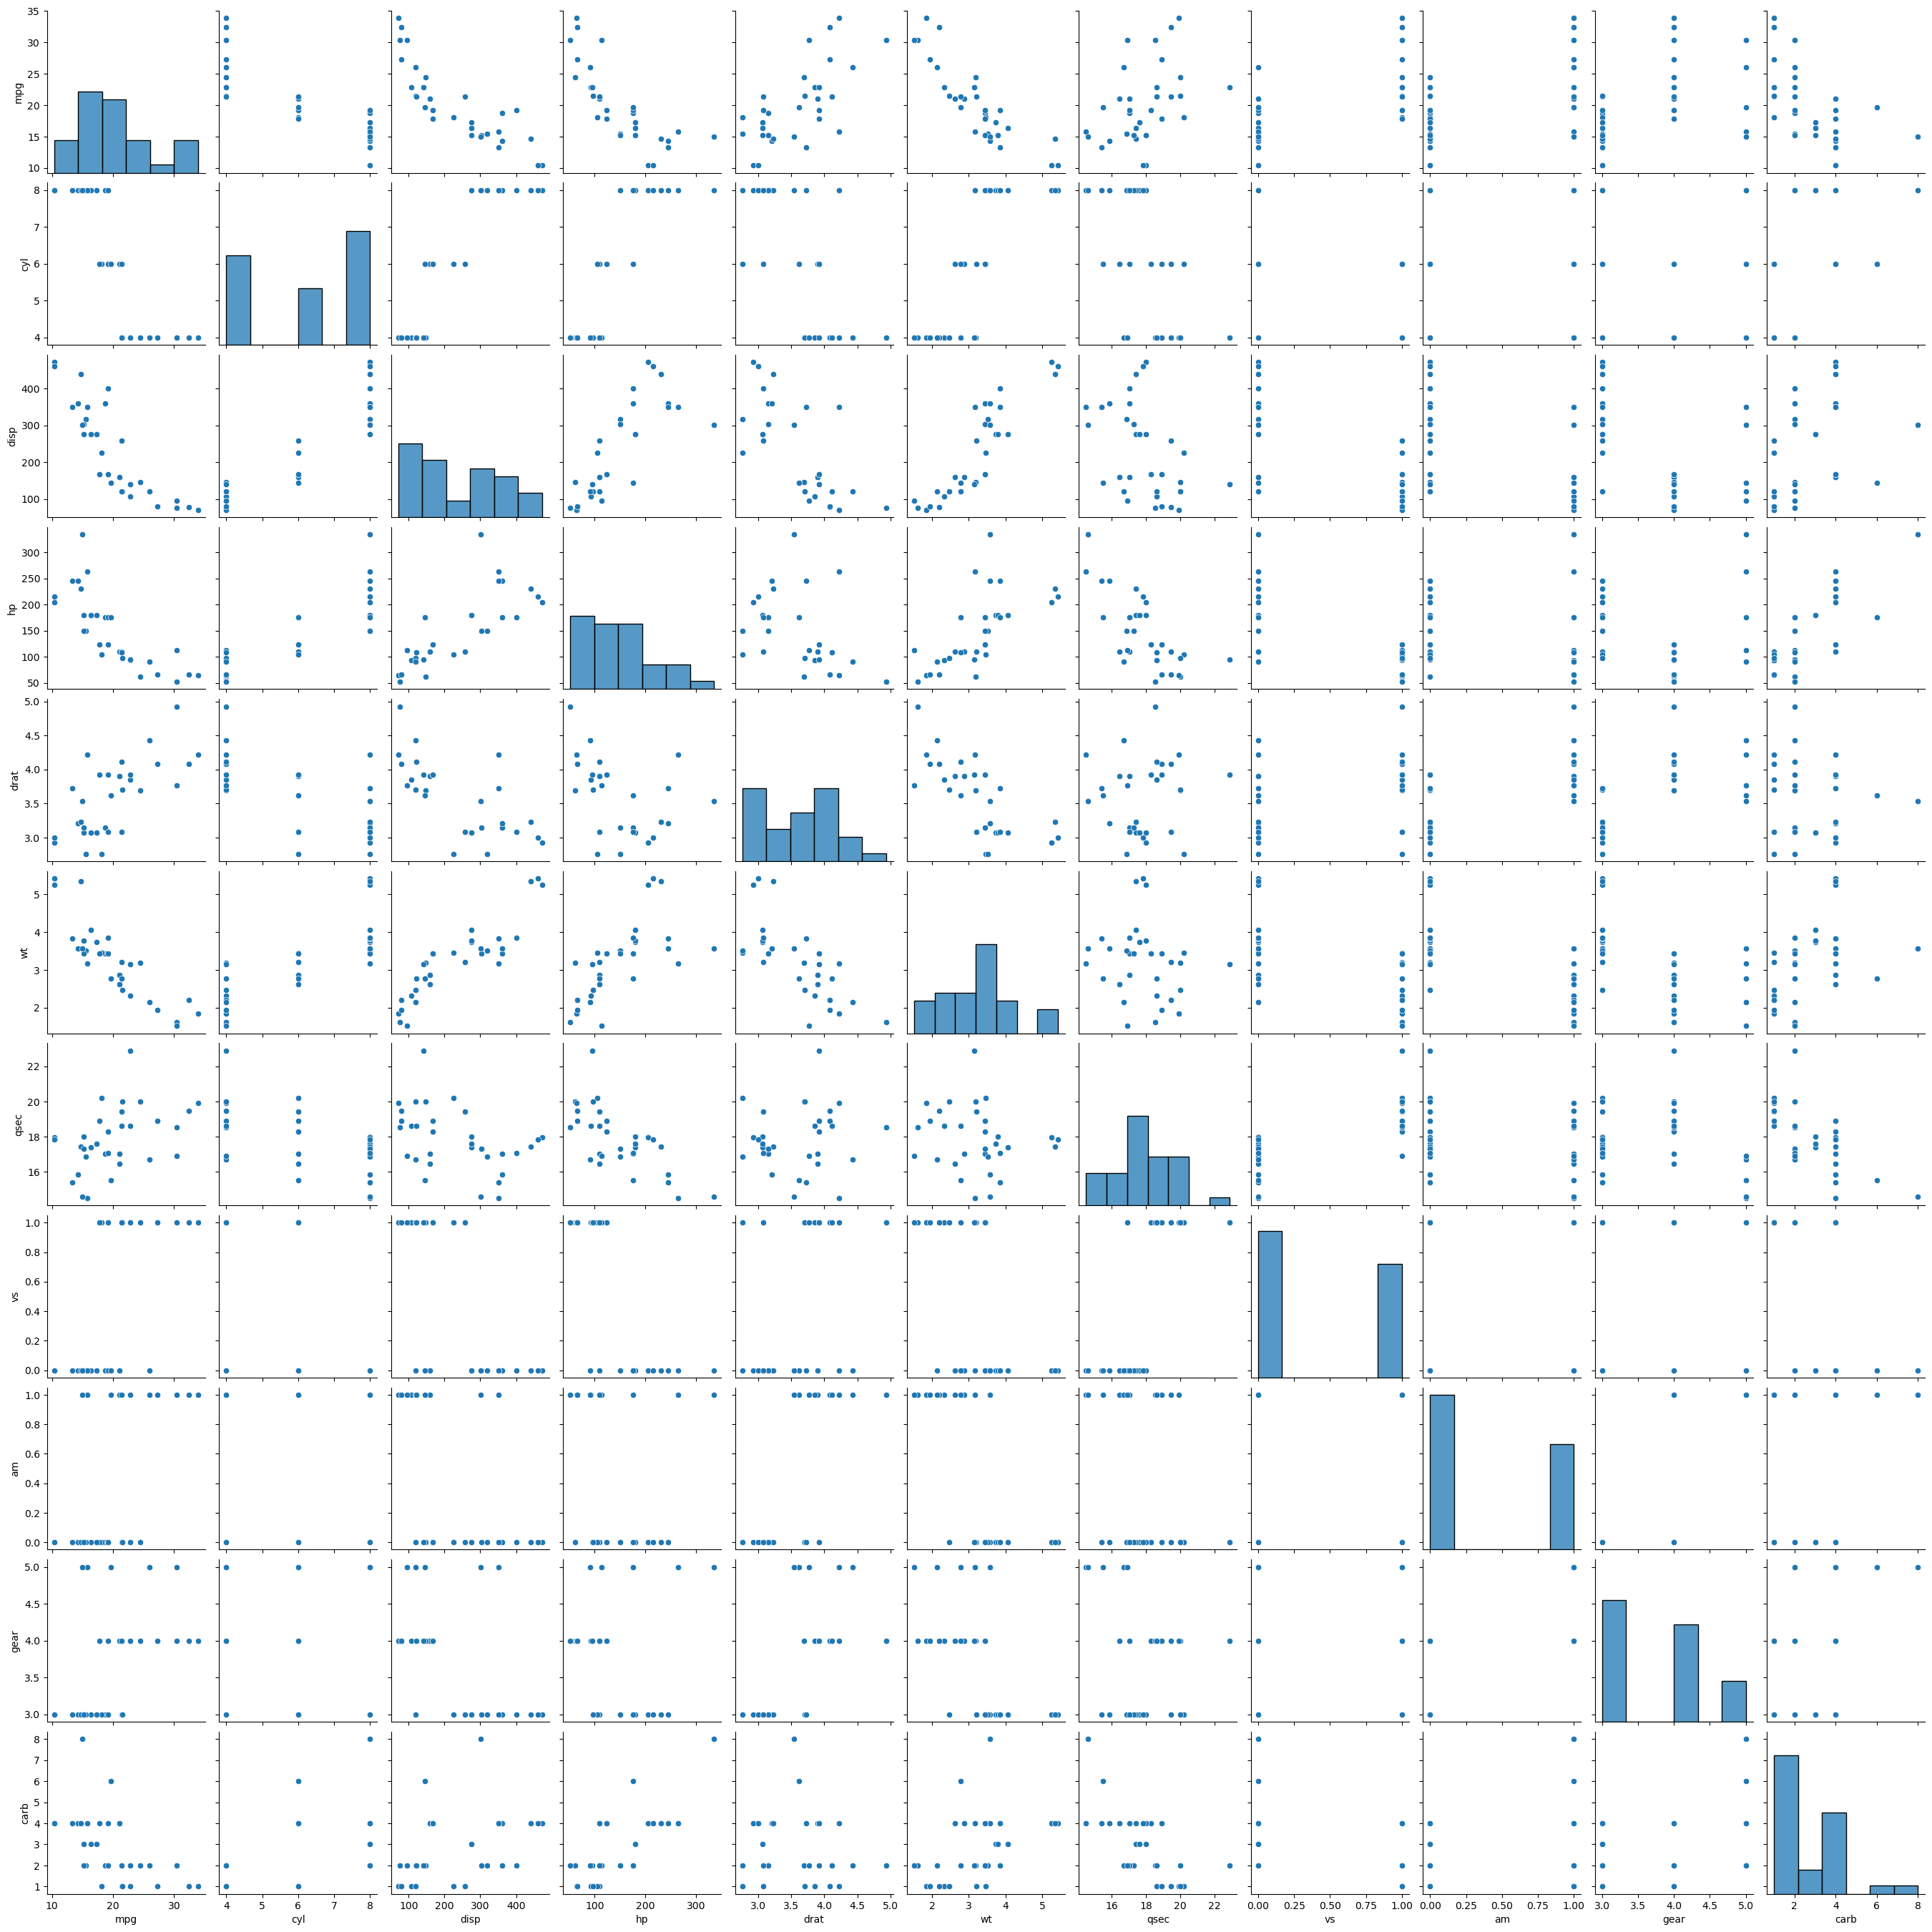

In [55]:
sns.pairplot(df)

- We shall use the variables 'cyl', 'disp', 'wt', 'drat'. The first three variables are negatively correlated and drat is positively correlated.

In [56]:
df = df[['cyl', 'disp', 'wt', 'drat', 'mpg']]
df.head()

,cyl,disp,wt,drat,mpg
0,6,160.0,2.620,3.90,21.0
1,6,160.0,2.875,3.90,21.0
2,4,108.0,2.320,3.85,22.8
3,6,258.0,3.215,3.08,21.4
4,8,360.0,3.440,3.15,18.7


In [57]:
# lets scale the data before applying Sklearn and SGD Regressor model.

In [58]:
df_num = df.iloc[:, :4]

In [59]:
df_num.head()

,cyl,disp,wt,drat
0,6,160.0,2.620,3.90
1,6,160.0,2.875,3.90
2,4,108.0,2.320,3.85
3,6,258.0,3.215,3.08
4,8,360.0,3.440,3.15


In [60]:
X_scaler = MinMaxScaler()
num_scaled = X_scaler.fit_transform(df_num)
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

In [61]:
y = df['mpg']
X = df_num_scaled.copy()

In [62]:
X.head()

,cyl,disp,wt,drat
0,0.5,0.221751,0.283048,0.525346
1,0.5,0.221751,0.348249,0.525346
2,0.0,0.092043,0.206341,0.502304
3,0.5,0.466201,0.435183,0.147465
4,1.0,0.720629,0.492713,0.179724


In [63]:
# Lets split the data into training and testing set.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [66]:
w = lin_reg.coef_
b = lin_reg.intercept_

w, b

(array([ -5.79644074,   0.22836429, -12.33013628,   0.43270211]),
 28.178087828509206)

In [67]:
print(f"The linear regression model based on the training data is \n")
print(f"predicted_sales = {np.round(w[0],3)} * cyl + {np.round(w[1],3)} * disp + {np.round(w[2],3)} * wt + {np.round(w[3],3)} * drat + {np.round(b,3)}")

The linear regression model based on the training data is 

predicted_sales = -5.796 * cyl + 0.228 * disp + -12.33 * wt + 0.433 * drat + 28.178


In [68]:
mse_train = mean_squared_error(y_train, lin_reg.predict(X_train))
mse_test = mean_squared_error(y_test, lin_reg.predict(X_test))

print(f"RMSE on the training data: {np.sqrt(mse_train)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test)}")

RMSE on the training data: 2.3219771683421064

RMSE on the test data: 2.8759548891309445


### Now lets scale the after doing the train test split and compare the values.

In [69]:
df_num.head(2)

,cyl,disp,wt,drat
0,6,160.0,2.620,3.9
1,6,160.0,2.875,3.9


In [70]:
X_train, X_test, y_train, y_test = train_test_split(df_num, y, test_size=0.2, random_state=42)

In [71]:
scaler = MinMaxScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [72]:
lin_reg = LinearRegression()

lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [73]:
w = lin_reg.coef_
b = lin_reg.intercept_

w, b

(array([ -5.79644074,   0.22836429, -12.08107447,   0.43270211]),
 28.178087828509206)

In [74]:
print(f"The linear regression model based on the training data is \n")
print(f"predicted_sales = {np.round(w[0],3)} * cyl + {np.round(w[1],3)} * disp + {np.round(w[2],3)} * wt + {np.round(w[3],3)} * drat + {np.round(b,3)}")

The linear regression model based on the training data is 

predicted_sales = -5.796 * cyl + 0.228 * disp + -12.081 * wt + 0.433 * drat + 28.178


In [75]:
mse_train = mean_squared_error(y_train, lin_reg.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, lin_reg.predict(X_test_scaled))

print(f"RMSE on the training data: {np.sqrt(mse_train)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test)}")

RMSE on the training data: 2.3219771683421064

RMSE on the test data: 2.8759548891309454


- We shall apply the SGD Regressor on this data and check the difference in RMSE.

### SGD Regressor

In [76]:
sgd_reg = SGDRegressor()

sgd_reg.fit(X_train_scaled, y_train)

SGDRegressor()

In [77]:
w = sgd_reg.coef_
b = sgd_reg.intercept_

w, b

(array([-4.61240506, -3.04233271, -1.52694086,  9.49004534]),
 array([20.70781202]))

In [78]:
print(f"The SGD regression model based on the training data is \n")
print(f"predicted_sales = {np.round(w[0],3)} * cyl + {np.round(w[1],3)} * disp + {np.round(w[2],3)} * wt + {np.round(w[3],3)} * drat + {np.round(b,3)}")

The SGD regression model based on the training data is 

predicted_sales = -4.612 * cyl + -3.042 * disp + -1.527 * wt + 9.49 * drat + [20.708]


In [79]:
mse_train = mean_squared_error(y_train, sgd_reg.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, sgd_reg.predict(X_test_scaled))

print(f"RMSE on the training data: {np.sqrt(mse_train)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test)}")

RMSE on the training data: 2.905300052278961

RMSE on the test data: 3.5266601480740225


- `Inference`: For this data, it seems like LinearRegression model works better than SGDRegressor.

`Summary`:
- In this assignment, we have converged the data to the local minima before reaching 100 ie, we reached to the local minima much before.
- We have applied SGD Regressor model after scaling the data. If we do not scale the data and apply SGD Regressor model, the data points do not fit perfectly on the graph and we also get different results. So scaling is a must for applying SGD Regressor.
- The SGD Regressor might reach to the local minima much early since it follows a zig zag pattern. 
- We have applied the scaling before train test split and also done the scaling after splitting the data and checked the results. But in usual practice, we have to scale the data after splitting the data.